### Video Game Sales Predictor Application
This application examines video game sales data with graphs and a linear regression model is utilized to predict values based on inputs from the user. Press the voila button on the JupyterLab toolbar to get started.

In [1]:
# Written by Eric Trevorrow

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from pylab import rcParams
import ipywidgets as widgets


# Reading the csv file and cleaning up the data
# CSV file created by Kendall Gillies, from https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings
video_game_sales = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")
video_game_sales.replace(to_replace ="Role-Playing", 
                 value = "Roleplaying", 
                  inplace = True)

# Gets rid of rows with missing values in a column
video_game_sales.dropna(subset=["Critic_Score"], inplace=True)
video_game_sales.dropna(subset=["User_Score"], inplace=True)
video_game_sales.dropna(subset=["Year_of_Release"], inplace=True)
video_game_sales.dropna(subset=["Rating"], inplace=True)

# Removes columns that are not needed for the application
video_game_sales.drop("Platform", inplace=True, axis=1)
video_game_sales.drop("Year_of_Release", inplace=True, axis=1)
video_game_sales.drop("Publisher", inplace=True, axis=1)
video_game_sales.drop("Rating", inplace=True, axis=1)

# Removes outliers above 10 million global sales
video_game_sales = video_game_sales[video_game_sales['Global_Sales'] <= 10.0]

### Data Sample
Below is a sample of the data that we will be using for this application. Sales are in millions, critic score is out of 100, and user score is out of 10.0.

In [2]:
video_game_sales.head(5)

,Name,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
64,Halo: Reach,Shooter,7.06,1.97,0.08,0.79,9.90,91.0,99.0,7.9,2053.0
66,Halo 4,Shooter,6.68,2.30,0.04,0.74,9.77,87.0,87.0,7.0,3273.0
67,Final Fantasy VII,Roleplaying,3.01,2.47,3.28,0.96,9.72,92.0,20.0,9.2,1297.0
68,Gran Turismo 2,Racing,3.88,3.42,1.69,0.50,9.49,93.0,23.0,9.0,135.0
69,Just Dance 2,Misc,5.80,2.85,0.01,0.78,9.44,74.0,24.0,7.3,24.0


### This pie chart represents the breakdown of global sales by percentage.
Shown below is a pie chart that contains North American sales, European Sales, Japanese sales, and Other sales. Added together, the values are equal to the global sales amount in the cleaned up dataset. Here, we can see that North America counts for 51.5% of global sales. Europe comes in second, accounting for 30.2% of global sales. Other regions add up to be 10.4% of global sales. Finally, Japan accounts for 7.9% of global sales.

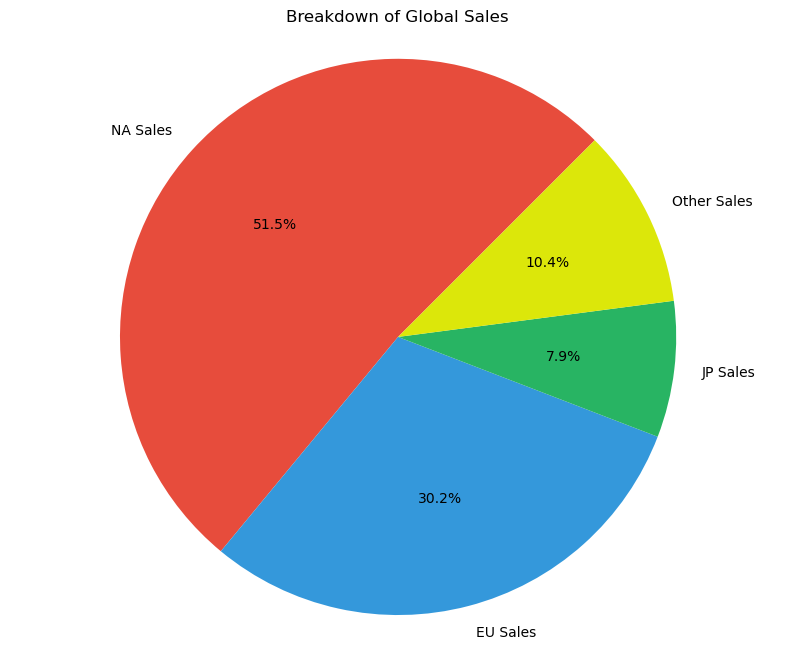

In [3]:
# Code to create a pie chart using NA Sales, EU Sales, JP Sales, and Other Sales
rcParams['figure.figsize'] = 10,8
labels = 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'
sizes = [video_game_sales["NA_Sales"].sum(), video_game_sales["EU_Sales"].sum(), video_game_sales["JP_Sales"].sum(), video_game_sales["Other_Sales"].sum()]
colors = ["#E74C3C", "#3498DB", "#28B463", "#DCE70A"]
fig, ax1 = plt.subplots()
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100))
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=45)
ax1.axis('equal')
plt.title('Breakdown of Global Sales')
plt.show()

### This bar chart represents the number of games in each genre within the cleaned up dataset.
Shown below is a bar chart that contains each of the genres in our dataset. Here we can see the amount of games for each genre. Action games are the most made genre of video game, followed by sports and so on. Puzzle games are the least made genre of video game, with adventure games being second to last.

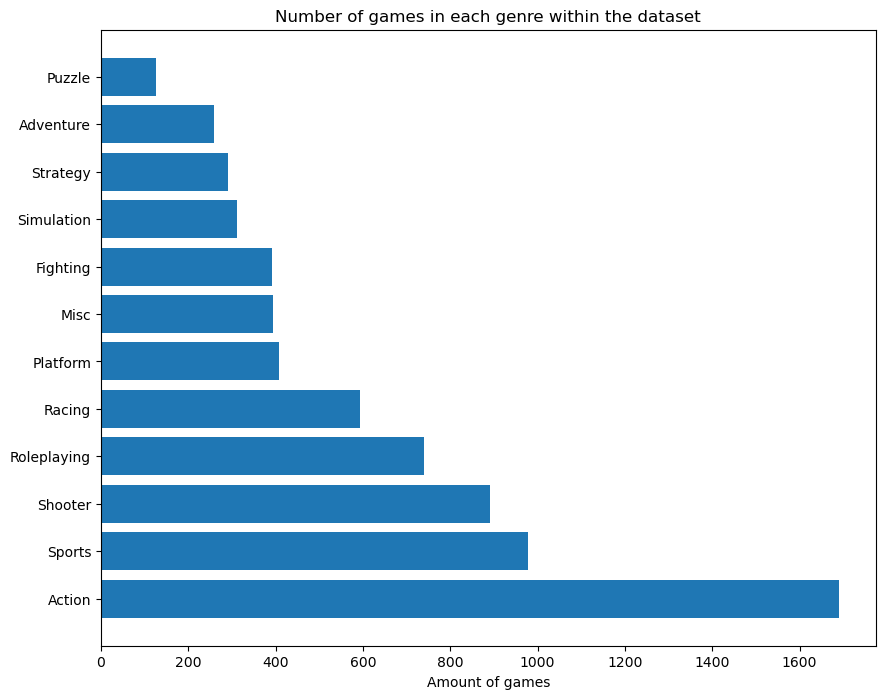

In [4]:
# Code to create a bar chart using genres and value counts
rcParams['figure.figsize'] = 10,8
genre_number = {"Action": video_game_sales['Genre'].value_counts().Action,
                    "Sports": video_game_sales['Genre'].value_counts().Sports,
                    "Shooter": video_game_sales['Genre'].value_counts().Shooter,
                    "Roleplaying": video_game_sales['Genre'].value_counts().Roleplaying,
                   "Racing": video_game_sales['Genre'].value_counts().Racing,
                   "Platform": video_game_sales['Genre'].value_counts().Platform,
                   "Misc": video_game_sales['Genre'].value_counts().Misc,
                   "Fighting": video_game_sales['Genre'].value_counts().Fighting,
                   "Simulation": video_game_sales['Genre'].value_counts().Simulation,
                   "Strategy": video_game_sales['Genre'].value_counts().Strategy,
                   "Adventure": video_game_sales['Genre'].value_counts().Adventure,
                   "Puzzle": video_game_sales['Genre'].value_counts().Puzzle}
fig, ax2 = plt.subplots()
ax2.barh(list(genre_number.keys()), list(genre_number.values()));
ax2.set(title="Number of games in each genre within the dataset", 
      xlabel = "Amount of games");

### These scatterplots showcase the relationships between Global Sales and Critic Scores, or Global Sales and User Scores.
Select the Critic Scores or User Scores buttons to generate the respective scatterplot. Below are scatterplots that have Global Sales on the Y axis and either Critic Scores or User scores on the X axis depending on what is selected. Each red triangle represents a video game. We can see that in general, higher scores tends to favor higher sales. Here, we use the polyfit function to derive the linear regression line to show a positive relationship between the two variables.

In [5]:
# Creation of the buttons used to generate the scatterplots
critic_button = widgets.Button(
    description='Critic Scores',
    disabled=False,
    button_style='info',
    tooltip='Critic Scores'
)
user_button = widgets.Button(
    description='User Scores',
    disabled=False,
    button_style='info',
    tooltip='User Scores'
)
output = widgets.Output()

# This function generates the scatterplot that uses Global Sales and Critic Scores
def critic_function(b):
    rcParams['figure.figsize'] = 10,8
    plt.plot(video_game_sales['Critic_Score'], video_game_sales['Global_Sales'], 'r^');
    m, b = np.polyfit(video_game_sales['Critic_Score'], video_game_sales['Global_Sales'], 1)
    plt.plot(video_game_sales['Critic_Score'], m*video_game_sales['Critic_Score']+b, label='Linear Regression')
    plt.xlabel("Critic Scores")
    plt.ylabel("Global Sales (Millions)")
    plt.title("Relationship between Global Sales and Critic Scores")
    plt.legend(('Video Game', 'Regression Line'))
    with output:
        output.clear_output()
        plt.show()

# This function generates the scatterplot that uses Global Sales and User Scores
def user_function(b):
    rcParams['figure.figsize'] = 10,8
    plt.plot(video_game_sales['User_Score'], video_game_sales['Global_Sales'], 'r^');
    m, b = np.polyfit(video_game_sales['User_Score'], video_game_sales['Global_Sales'], 1)
    plt.plot(video_game_sales['User_Score'], m*video_game_sales['User_Score']+b, label='Linear Regression')
    plt.xlabel("User Scores")
    plt.ylabel("Global Sales (Millions)")
    plt.title("Relationship between Global Sales and User Scores")
    plt.legend(('Video Game', 'Regression Line'))
    with output:
        output.clear_output()
        plt.show()

critic_button.on_click(critic_function)
user_button.on_click(user_function)
buttons = widgets.HBox([critic_button, user_button])
widgets.VBox([buttons, output])

In [6]:
# Code to create the Critic Scores scatterplot. This is created so that the graph loads on startup of the application.
rcParams['figure.figsize'] = 10,8
plt.plot(video_game_sales['Critic_Score'], video_game_sales['Global_Sales'], 'r^');
m, b = np.polyfit(video_game_sales['Critic_Score'], video_game_sales['Global_Sales'], 1)
plt.plot(video_game_sales['Critic_Score'], m*video_game_sales['Critic_Score']+b, label='Linear Regression')
plt.xlabel("Critic Scores")
plt.ylabel("Global Sales (Millions)")
plt.title("Relationship between Global Sales and Critic Scores")
plt.legend(('Video Game', 'Regression Line'))
with output:
    output.clear_output()
    plt.show()

### Linear Regression Model
A linear regression prediction model is used in this application. The Linear Regressor takes in Critic Scores, Critic Count, User Scores, and User count as inputs in order to predict a Global Sales value. The model is trained on 80% of the rows and tests on the remaining 20%. The R^2 value determines how accurate the model is, with 1.0 being completely perfect and 0.0 being inaccurate. Below is the R^2 value of the Linear Regressor based on the inputted data.

In [7]:
# Code for the linear regression prediction model
# A random seed is generated
np.random.seed(42)

# The data is split and created
X = video_game_sales[["Critic_Score", "User_Score", "Critic_Count", "User_Count"]]
y = video_game_sales["Global_Sales"]

# The test sets are split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# LinearRegression is instantiated
model = LinearRegression()

# The model is fit to the data so that the machine learning model can be trained
model.fit(X_train.values, y_train);
score = "R^2 = %.4f" % model.score(X_test.values, y_test)

print(score)

R^2 = 0.2035


Mean absolute error is the average difference between actual values and predicted values calculated through the Linear Regression model. Below is the mean absolute error value of the Linear Regressor based on the inputted data.

In [8]:
# Code to calculate the Mean Absolute Error
y_prediction_mae = model.predict(X_test.values)
mae = "Mean Absolute Error = %.4f" % mean_absolute_error(y_test, y_prediction_mae)
print(mae)

Mean Absolute Error = 0.5801


### Prediction Application
Below are a series of boxes where a user can input their own values for Critic Rating, User Rating, Critic Count, and User Count. When the user clicks the predict button, a function will run that uses the inputted user values and runs it through the trained Linear Regression model. The outputted value is the predicted Global Sales value for the attributes given. The Global Sales value unit is in millions.

In [9]:
# This creates a widget box that takes in Critic Rating
critic_rating_box = widgets.IntText(
    value=75,
    min=0,
    max=100.0,
    description='Critic Rating:',
    disabled=False
)
critic_rating_selection = widgets.Output()
critic_rating_widget = widgets.VBox([critic_rating_box, critic_rating_selection])
critic_rating_widget

In [10]:
# This creates a widget box that takes in User Rating
user_rating_box = widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='User Rating:',
    disabled=False
)
user_rating_selection = widgets.Output()
user_rating_widget = widgets.VBox([user_rating_box, user_rating_selection])
user_rating_widget

In [11]:
# This creates a widget box that takes in Critic Count
critic_count_box = widgets.IntText(
    value=100,
    min=0,
    max=3000,
    description='Critic Count:',
    disabled=False
)
critic_count_selection = widgets.Output()
critic_count_widget = widgets.VBox([critic_count_box, user_rating_selection])
critic_count_widget

In [12]:
# This creates a widget box that takes in User Count
user_count_box = widgets.IntText(
    value=100,
    min=0,
    max=3000,
    description='User Count:',
    disabled=False
)
user_count_selection = widgets.Output()
user_count_widget = widgets.VBox([user_count_box, user_rating_selection])
user_count_widget

In [13]:
# This code creates a predict button
button = widgets.Button(
    description='Predict!',
    disabled=False,
    button_style='info',
    tooltip='Generate Prediction',
    icon='check'
)
output2 = widgets.Output()

# Function that generates a Global Sales value based on the values selected above using the trained Linear Regression model
def predict_function(b):
    np.random.seed(42)
    
    critic_rating = critic_rating_box.value
    user_rating = user_rating_box.value
    critic_amount = critic_count_box.value
    user_amount = user_count_box.value
    
    X_pred = [[critic_rating, user_rating, critic_amount, user_amount]]
    np_array = np.array(X_pred)
    y_pred = model.predict(np_array)
    
    with output2:
        output2.clear_output()
        print("This game is predicted to sell this many units globally (Millions):")
        print(y_pred)

button.on_click(predict_function)

widgets.VBox([button, output2])